In [1]:
# nEXO exp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import histlite
from tqdm.notebook import tqdm
import seaborn as sns
from tqdm import tqdm

import sys
sys.path.append('/p/lustre1/yu47/Sterile_Neutrino/sensitivity/')

from fitting import fitting

fit = fitting()

In [2]:
def parse_parameters(dm2, sin2,):
    label = r'$\Delta m^2=$' + f'{dm2:.5f}' + r' eV$^2, \sin^2(2\theta) = $' + f'{sin2:.5f}'
    return label

In [57]:
fit._set_dataset_asimov_filename('/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.01m.p')
#fit._set_PDF_filename('/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_dmsquare5.00000sinsquare0.50000_source14cm_smear0.01m.p')
#fit._set_PDF_filename('/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare1.32194eV2/MC_dmsquare1.32194sinsquare0.11768_source14cm_smear0.01m.p')
#fit._set_PDF_filename('/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_dmsquare0.86975sinsquare0.24771_source14cm_smear0.01m.p')
fit._set_PDF_filename('/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare0.01000eV2/MC_dmsquare0.01000sinsquare0.01097_source14cm_smear0.01m.p')

fit.reload()
#fit.draw_histograms(data_asimov=True, pdf=True);

Error occurs -> expected str, bytes or os.PathLike object, not NoneType


In [58]:
vals, errs, m = fit.minimize_chi_square()

In [59]:
m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.829                      │              Nfcn = 61               │
│ EDM = 1.57e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name            │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha_xsec      │   -0.00   │   0.04    │            │            │   -1    │    1    │       │
│ 1 │ alpha_init_flux │   -0.00   │   0.02    │            │            │   -1    │    1    │       │
│ 2 │ alpha_det_eff   │  -0.000   │   0.029   │            │            │   -1    │    1    │       │
└───┴─────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────────────┬─────────────────────────────────────────────────┐
│                 │      alpha_xsec alpha_init_flux   alpha_det_eff │
├─────────────────┼─────────────────────────────────────────────────┤
│      alpha_xsec │         0.00159         -0.3e-3         -0.8e-3 │
│ alpha_init_flux │         -0.3e-3        0.000389              -0 │
│   alpha_det_eff │         -0.8e-3              -0        0.000842 │
└─────────────────┴─────────────────────────────────────────────────┘

In [37]:
m.fval

4.964719699631283

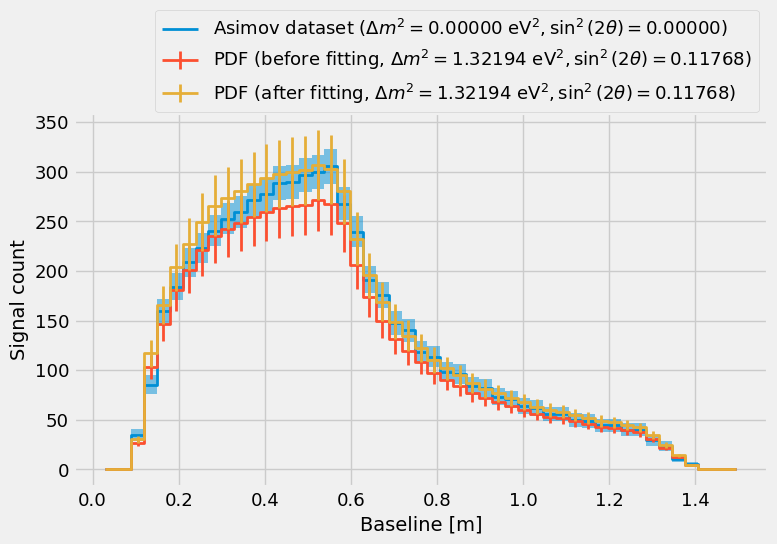

In [8]:
fit.draw_histograms(data_asimov=True, pdf=True, pdf_fitted=True);

## Two-dimensional fitting contour

In [8]:
dmsquare = np.logspace(-2, 1, 100)
sinsquare = np.logspace(-2, 0, 100)


fits = np.loadtxt('/p/lustre1/yu47/Sterile_Neutrino/jobs/Fits/MCalg_hist/3cmbin_smear0cm/fitting.txt')
alpha1_0 = fits[:, 0]
alpha1_0 = np.reshape(alpha1_0, (100, 100))
alpha2_0 = fits[:, 1]
alpha2_0 = np.reshape(alpha2_0, (100, 100))
alpha3_0 = fits[:, 2]
alpha3_0 = np.reshape(alpha3_0, (100, 100))
dchi2_0 = fits[:, 3]
dchi2_0 = np.reshape(dchi2_0, (100, 100))

fits = np.loadtxt('/p/lustre1/yu47/Sterile_Neutrino/jobs/Fits/MCalg_hist/3cmbin_smear1cm/fitting.txt')
alpha1_1 = fits[:, 0]
alpha1_1 = np.reshape(alpha1_1, (100, 100))
alpha2_1 = fits[:, 1]
alpha2_1 = np.reshape(alpha2_1, (100, 100))
alpha3_1 = fits[:, 2]
alpha3_1 = np.reshape(alpha3_1, (100, 100))
dchi2_1 = fits[:, 3]
dchi2_1 = np.reshape(dchi2_1, (100, 100))

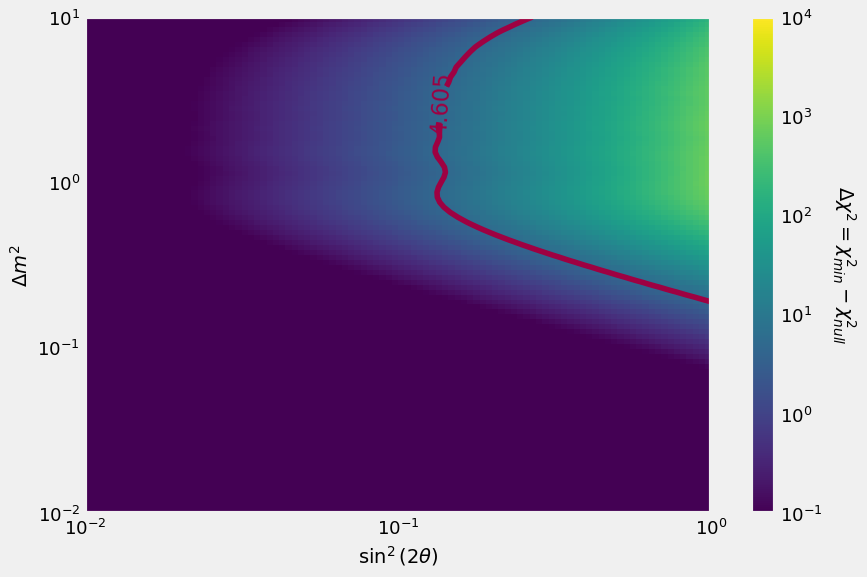

In [7]:
import matplotlib.colors as colors


dm2_edges = np.logspace(-2, 1, 101)
sin2_edges = np.logspace(-2, 0, 101)

dm2_cents = np.logspace(-2, 1, 100)
sin2_cents = np.logspace(-2, 0, 100)

fig, ax = plt.subplots(figsize=(9, 6))
im = ax.pcolormesh(sin2_edges, dm2_edges, dchi2_1, shading='flat', cmap='viridis', norm=colors.LogNorm(vmin=1e-1, vmax=1e4))
#im = ax.pcolormesh(sin2_edges, dm2_edges, alpha1, shading='flat', )
X, Y = np.meshgrid(sin2_cents, dm2_cents)
CS = ax.contour(X, Y, dchi2_1, levels=[4.605], cmap='Spectral')
ax.clabel(CS, inline=True, fontsize=16)
ax.loglog()
cb = plt.colorbar(im, ax=ax,)

cb.set_label(r'$\Delta\chi^2 = \chi^2_{min} - \chi^2_{null}$', fontsize=14, rotation=270, labelpad=25)
cb.ax.tick_params(labelsize=13)
 
ax.set_xlabel(r'$\sin^2(2\theta)$', fontsize=14)
ax.set_ylabel(r'$\Delta m^2$', fontsize=14)
ax.tick_params(labelsize=13)


plt.tight_layout()

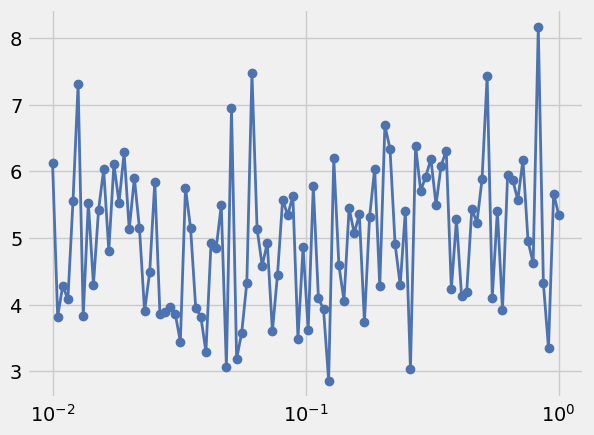

In [28]:
plt.style.use('seaborn-v0_8-deep')
row = 20
plt.plot(np.logspace(-2, 0, 100), dchi2[row, :], 'o-', lw=2)
plt.semilogx();

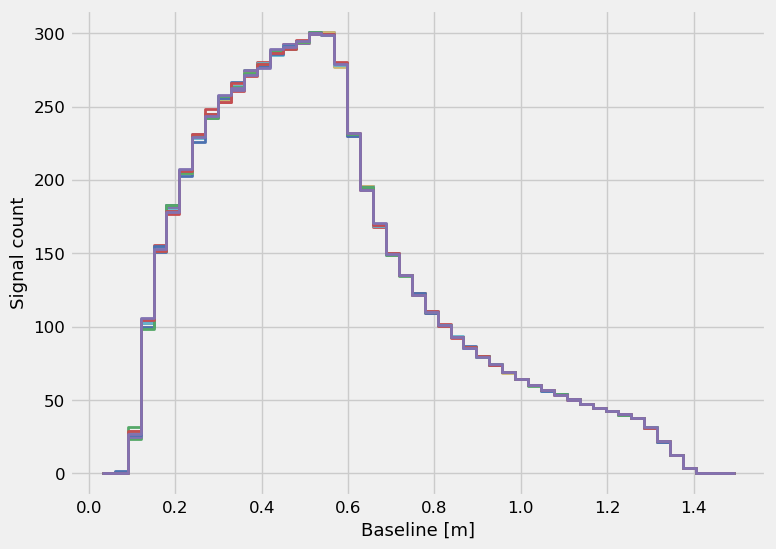

In [32]:
# Check PDFs

import pickle
hists = []
for sin2 in np.logspace(-2, 0, 100):
    file0 = f'/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare0.01000eV2/MC_dmsquare0.01000sinsquare{sin2:.5f}_source14cm_smear0.01m.p'
    with open(file0, 'rb') as f:
        h0 = pickle.load(f)
    hists.append(h0)

fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(hists), 10):
    h0 = hists[i]
    histlite.plot1d(ax, h0, lw=2, label=parse_parameters(0.01, 0.01520))
#ax.legend(fontsize=11)
ax.set_xlabel('Baseline [m]', fontsize=13)
ax.set_ylabel('Signal count', fontsize=13)
ax.tick_params(labelsize=12)

In [12]:
print(np.logspace(-2, 0, 100))

[0.01       0.01047616 0.01097499 0.01149757 0.01204504 0.01261857
 0.01321941 0.01384886 0.01450829 0.01519911 0.01592283 0.01668101
 0.01747528 0.01830738 0.0191791  0.02009233 0.02104904 0.02205131
 0.0231013  0.02420128 0.02535364 0.02656088 0.02782559 0.02915053
 0.03053856 0.03199267 0.03351603 0.03511192 0.0367838  0.03853529
 0.04037017 0.04229243 0.04430621 0.04641589 0.04862602 0.05094138
 0.05336699 0.0559081  0.05857021 0.06135907 0.06428073 0.06734151
 0.07054802 0.07390722 0.07742637 0.08111308 0.08497534 0.08902151
 0.09326033 0.097701   0.1023531  0.10722672 0.1123324  0.1176812
 0.12328467 0.12915497 0.13530478 0.14174742 0.14849683 0.15556761
 0.16297508 0.17073526 0.17886495 0.18738174 0.19630407 0.20565123
 0.21544347 0.22570197 0.23644894 0.24770764 0.25950242 0.27185882
 0.28480359 0.29836472 0.31257158 0.32745492 0.34304693 0.35938137
 0.37649358 0.39442061 0.41320124 0.43287613 0.45348785 0.47508102
 0.49770236 0.52140083 0.54622772 0.57223677 0.59948425 0.62802